# 1.Preprocessing- <span style="color:red">CATEGORICAL DATA</span>

### 1.1 Import libraries

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1.2 Import Data

In [84]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign column names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']


df=pd.read_csv(url,names=names)
df.head(4)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


### 1.2 To know how many <span style="color:blue">different classes</span> we in columns 'Class' are.

In [85]:
df['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 1.3 General Info about DataSet

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 1.4 Investigate of NaN Values in columns

In [87]:
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64

### 1.5 Plotting for general overview of the DataSet

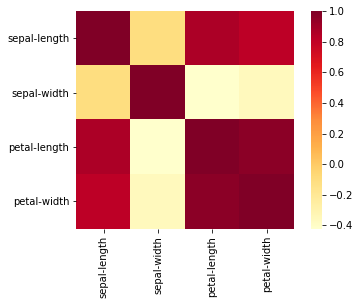

In [88]:
ax=sns.heatmap(df.corr(),square=True,cmap='YlOrRd')

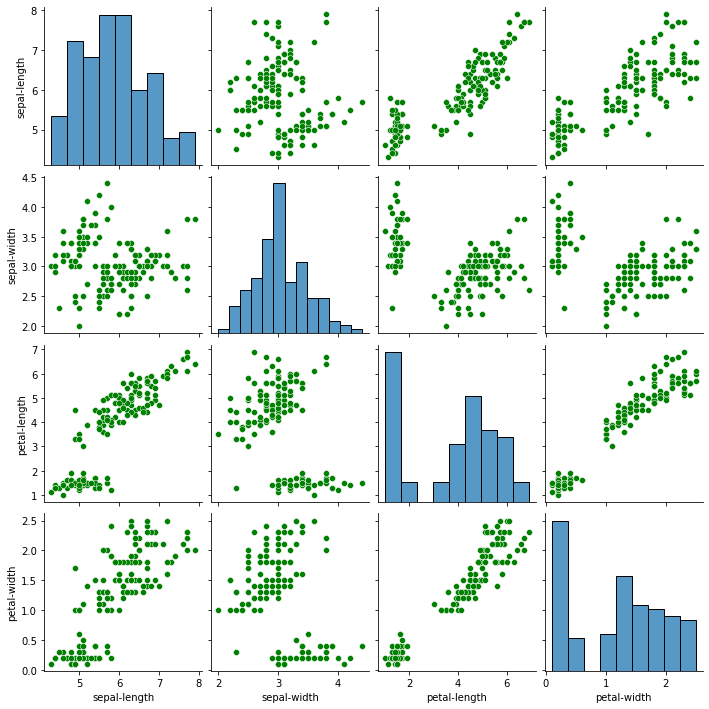

In [89]:
g = sns.pairplot(df, plot_kws={'color':'green'})

# 2. <span style="color:#0E6983">Processing</span>

### 2.1 Define of X,y

In [90]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

### 2.2 Define of <span style="color:red">train-test-split</span>

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

### 2.3 <span style="color:blue">FeatureScaling</span>

#### 2.3.1 <span style="color:blue">Call StandrdScaler</span>

In [92]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# 2.4 <span style="color:orange">Kneighbors Classifier</span>

In [96]:
from sklearn.neighbors import KNeighborsClassifier
classifire=KNeighborsClassifier(n_neighbors=5)
classifire.fit(X_train,y_train)

<ipython-input-96-9fe8cd48d698>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifire.fit(X_train,y_train)


KNeighborsClassifier()

# 2.5 <span style="color:green">Prediction</span>

In [98]:
y_pred=classifire.predict(X_test)

# 2.6 Confusion Matrix

In [103]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

